In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Load the data
df = pd.read_csv('~/buckets/b1/exp/HT2810/gridsearch_detalle_0.txt', sep='\t')

In [5]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   semilla        1880 non-null   int64  
 1   cp             1880 non-null   int64  
 2   maxdepth       1880 non-null   int64  
 3   minsplit       1880 non-null   int64  
 4   minbucket      1880 non-null   int64  
 5   ganancia_test  1880 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 88.3 KB
None
             semilla      cp     maxdepth     minsplit    minbucket  \
count    1880.000000  1880.0  1880.000000  1880.000000  1880.000000   
mean   540913.200000    -1.0     5.000000   403.829787    24.148936   
std    193486.244777     0.0     1.000266   345.632235    15.926894   
min    132967.000000    -1.0     4.000000    10.000000     5.000000   
25%    472801.000000    -1.0     4.000000   100.000000    10.000000   
50%    548187.000000    -1.0     5.000000   400.000000    20

In [8]:
# Sort by ganancia_mean descending
df_sorted = df.sort_values('ganancia_test', ascending=False)
print("Top 10 parameter combinations:")
print(df_sorted.head(10))

Top 10 parameter combinations:
      semilla  cp  maxdepth  minsplit  minbucket  ganancia_test
1347   511109  -1         6       400         20     56900000.0
1227   511109  -1         6       600         20     56900000.0
1107   511109  -1         6       800         20     56900000.0
1467   511109  -1         6       200         20     56790000.0
1327   511109  -1         6       400         10     56480000.0
1447   511109  -1         6       200         10     56480000.0
1207   511109  -1         6       600         10     56480000.0
1087   511109  -1         6       800         10     56480000.0
1847   511109  -1         6        10          5     55970000.0
1787   511109  -1         6        20          5     55950000.0


In [9]:
# Function to plot parameter impact
def plot_parameter_impact(df, param):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=param, y='ganancia_test', data=df)
    plt.title(f'Impact of {param} on ganancia_test')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.violinplot(x=param, y='ganancia_test', data=df)
    plt.title(f'Distribution of ganancia_test for different {param} values')
    plt.xticks(rotation=45)
    plt.show()

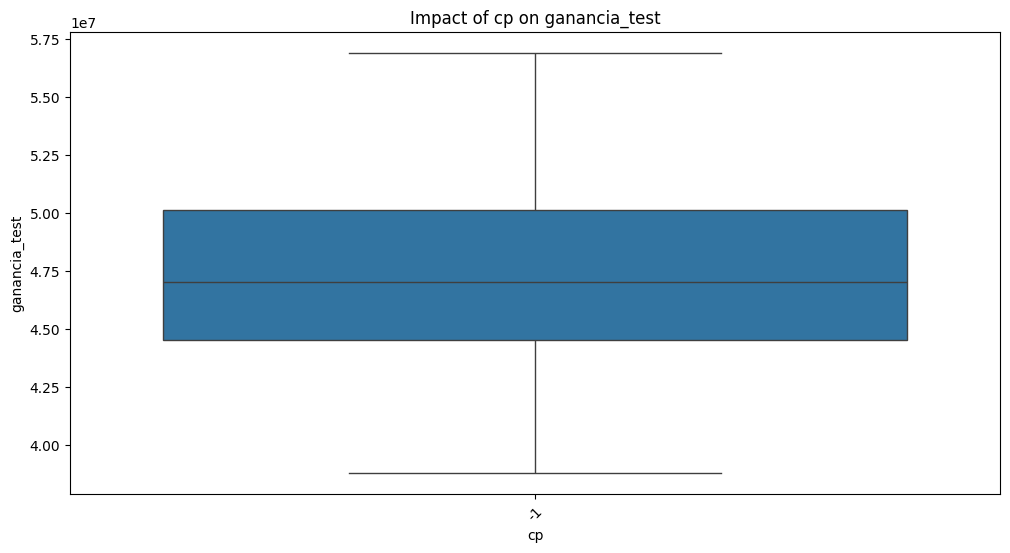

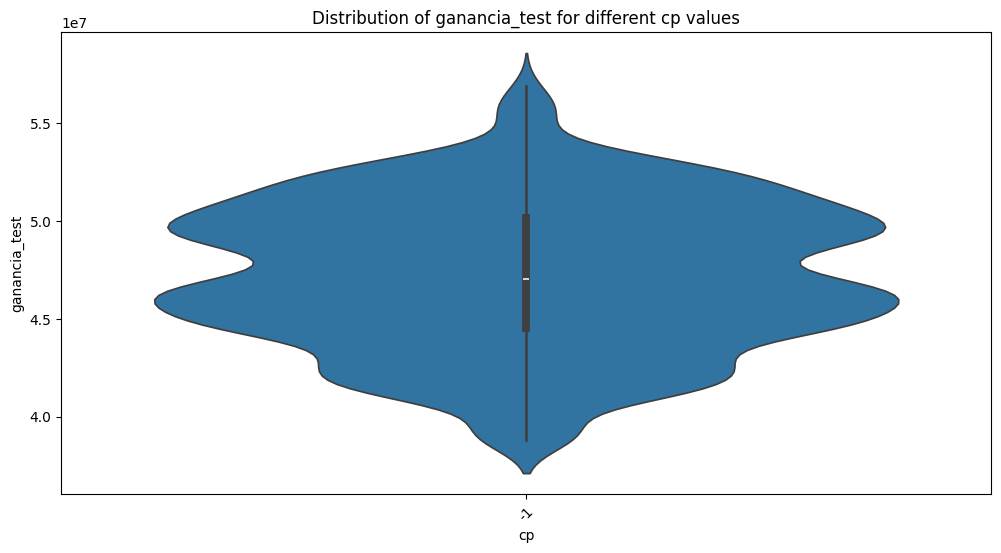

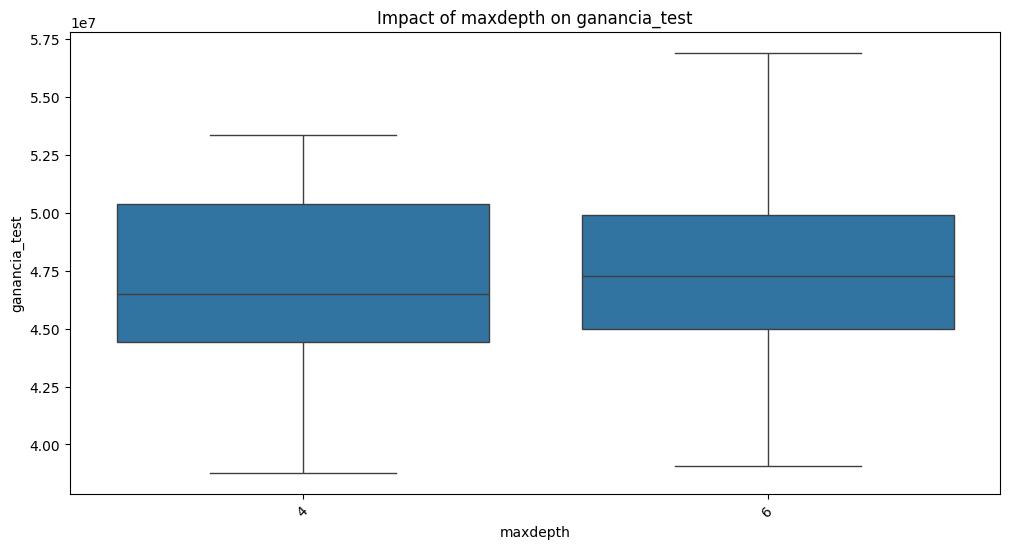

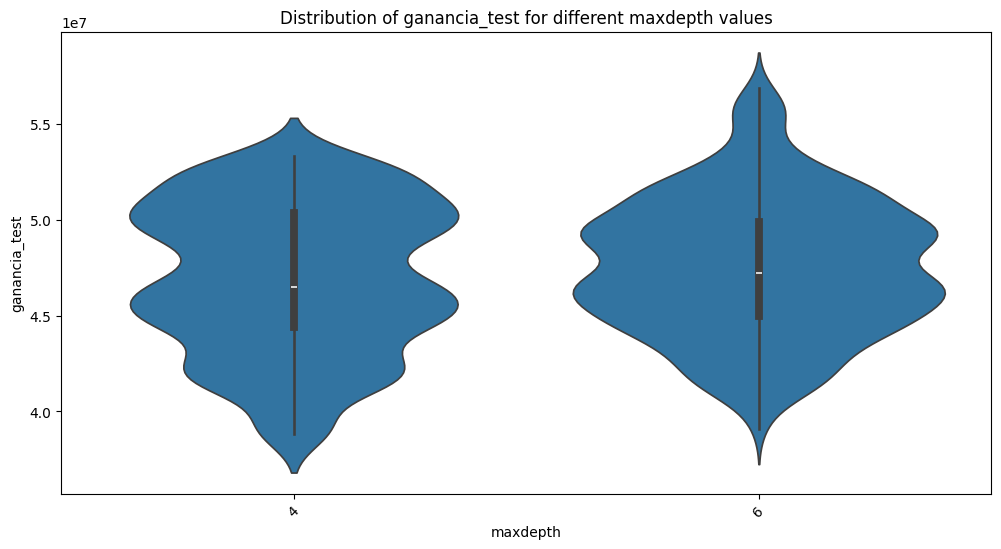

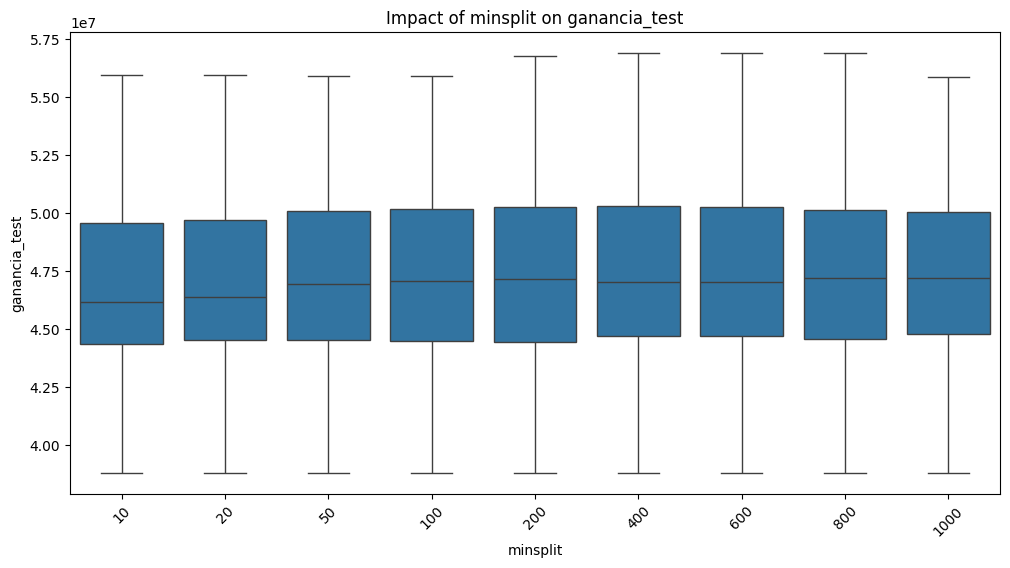

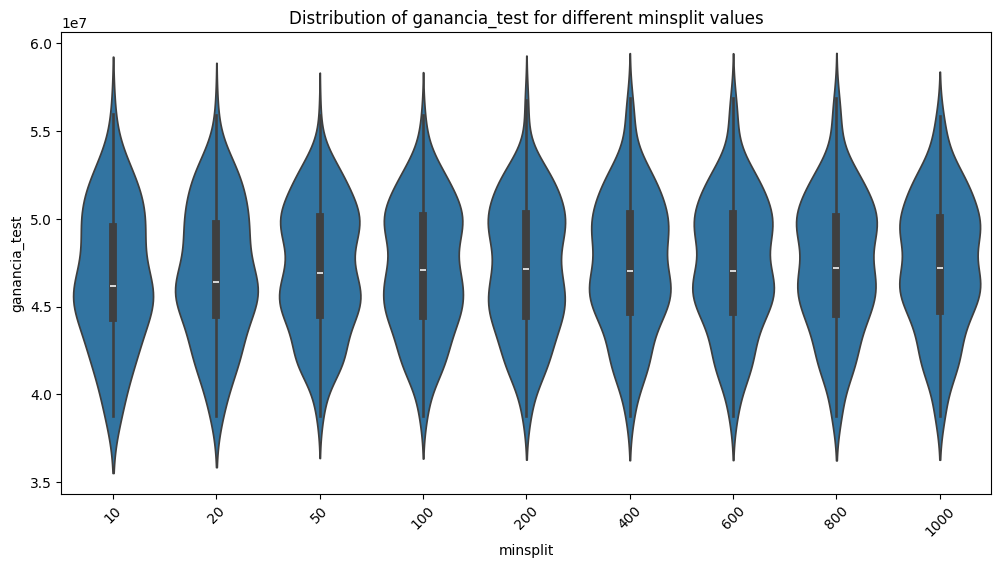

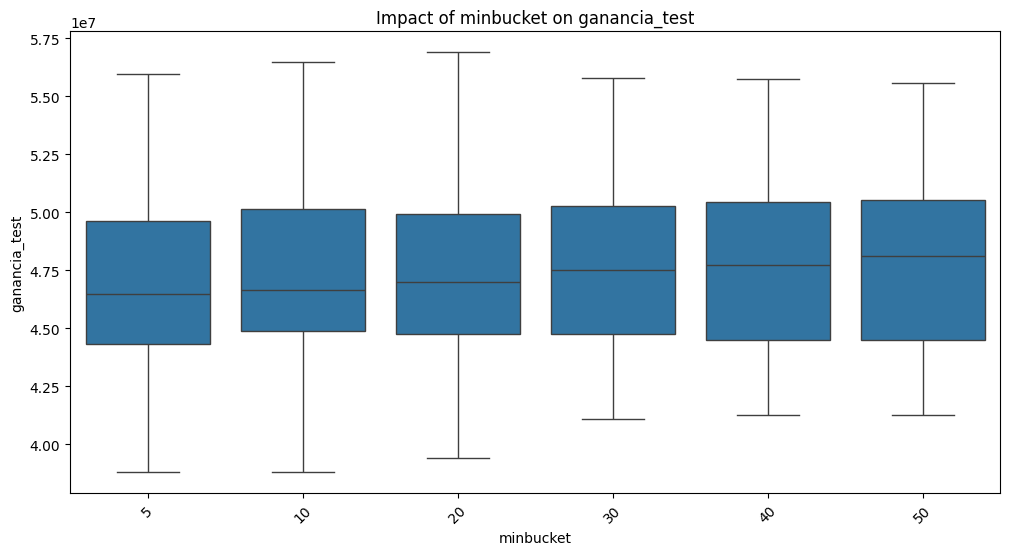

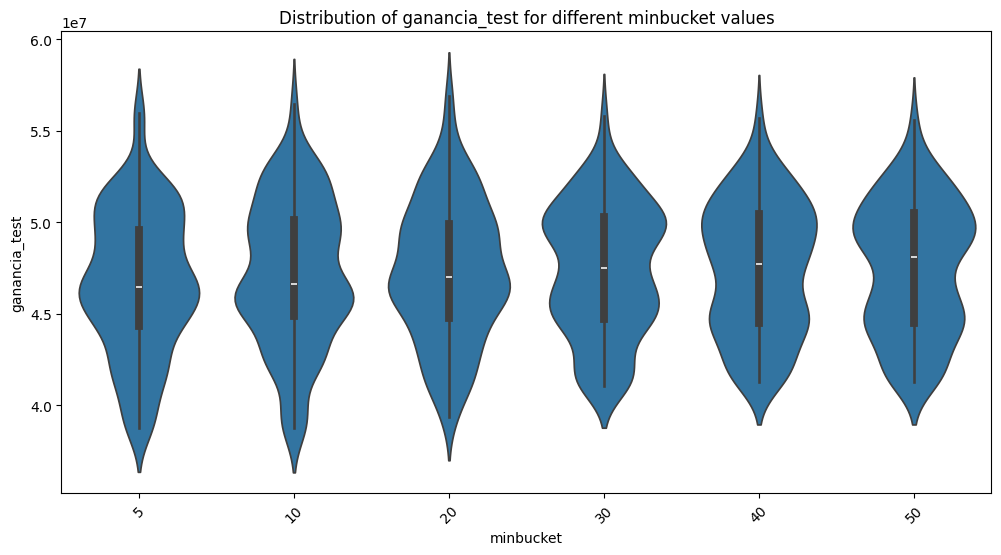

In [10]:
# Analyze the impact of each parameter on ganancia_mean
for param in ['cp', 'maxdepth', 'minsplit', 'minbucket']:
    plot_parameter_impact(df, param)

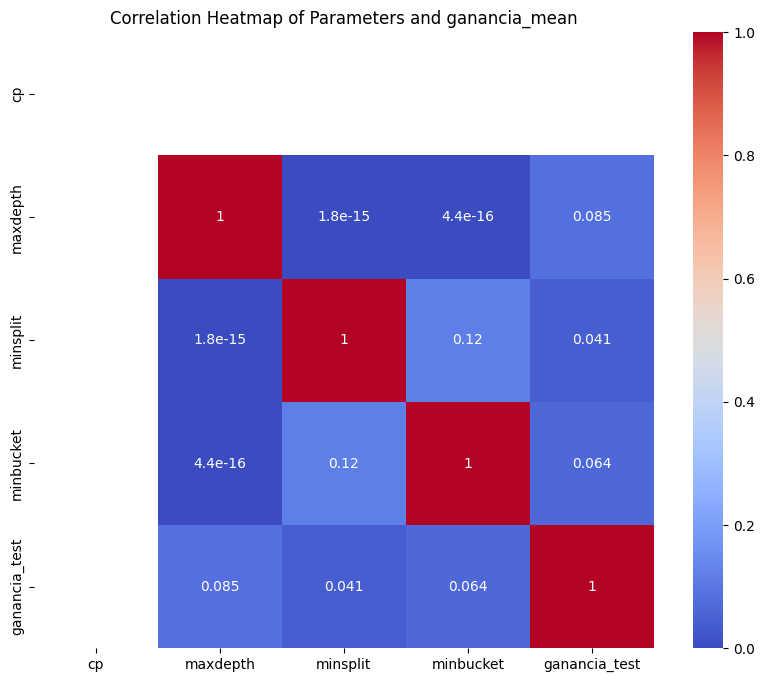

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['cp', 'maxdepth', 'minsplit', 'minbucket', 'ganancia_test']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Parameters and ganancia_mean')
plt.show()

In [13]:
# 3D scatter plot for top 3 most correlated parameters
from mpl_toolkits.mplot3d import Axes3D

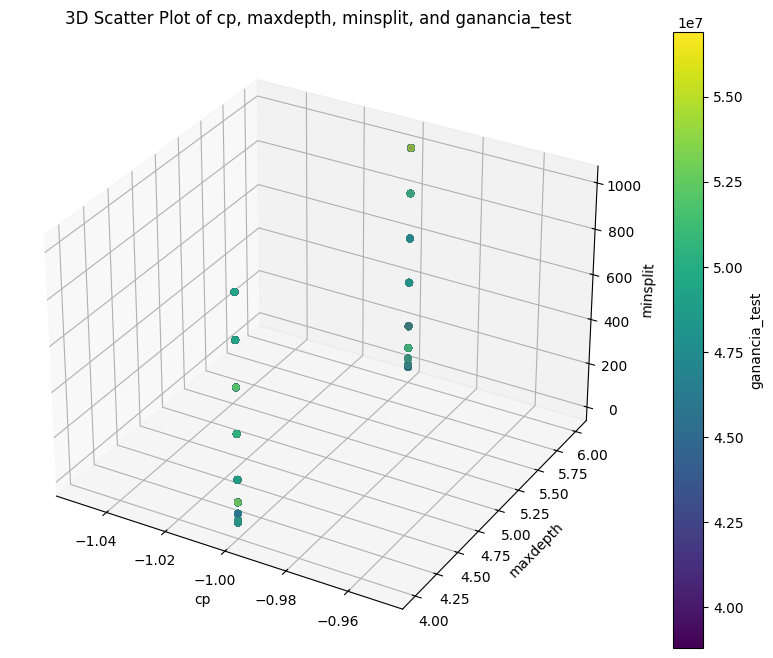

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['cp'], df['maxdepth'], df['minsplit'], c=df['ganancia_test'], cmap='viridis')
ax.set_xlabel('cp')
ax.set_ylabel('maxdepth')
ax.set_zlabel('minsplit')
plt.colorbar(scatter, label='ganancia_test')
plt.title('3D Scatter Plot of cp, maxdepth, minsplit, and ganancia_test')
plt.show()

In [18]:
# Function to get best combinations excluding certain parameters
def best_combinations_excluding(df, exclude_params):
    remaining_params = [p for p in ['cp', 'maxdepth', 'minsplit', 'minbucket'] if p not in exclude_params]
    return df.groupby(remaining_params)['ganancia_test'].mean().sort_values(ascending=False).head(10)

In [19]:
print("Best combinations excluding cp:")
print(best_combinations_excluding(df, ['cp']))

Best combinations excluding cp:
maxdepth  minsplit  minbucket
6         400       10           48341500.0
          200       10           48089000.0
          600       10           48074500.0
          800       40           47996500.0
                    20           47970000.0
          1000      20           47967500.0
          800       50           47940000.0
          1000      10           47901500.0
          100       10           47894000.0
          1000      40           47883000.0
Name: ganancia_test, dtype: float64


In [20]:
print("\nBest combinations excluding maxdepth:")
print(best_combinations_excluding(df, ['maxdepth']))


Best combinations excluding maxdepth:
cp  minsplit  minbucket
-1  800       50           47721250.0
              40           47708000.0
    600       50           47683500.0
    1000      50           47681250.0
    600       40           47657000.0
    1000      40           47651250.0
    800       30           47615250.0
    400       50           47606250.0
              40           47597250.0
    1000      30           47596000.0
Name: ganancia_test, dtype: float64


In [21]:
print("\nBest combinations excluding minsplit and minbucket:")
print(best_combinations_excluding(df, ['minsplit', 'minbucket']))


Best combinations excluding minsplit and minbucket:
cp  maxdepth
-1  6           4.755845e+07
    4           4.692059e+07
Name: ganancia_test, dtype: float64


<Figure size 1500x1000 with 0 Axes>

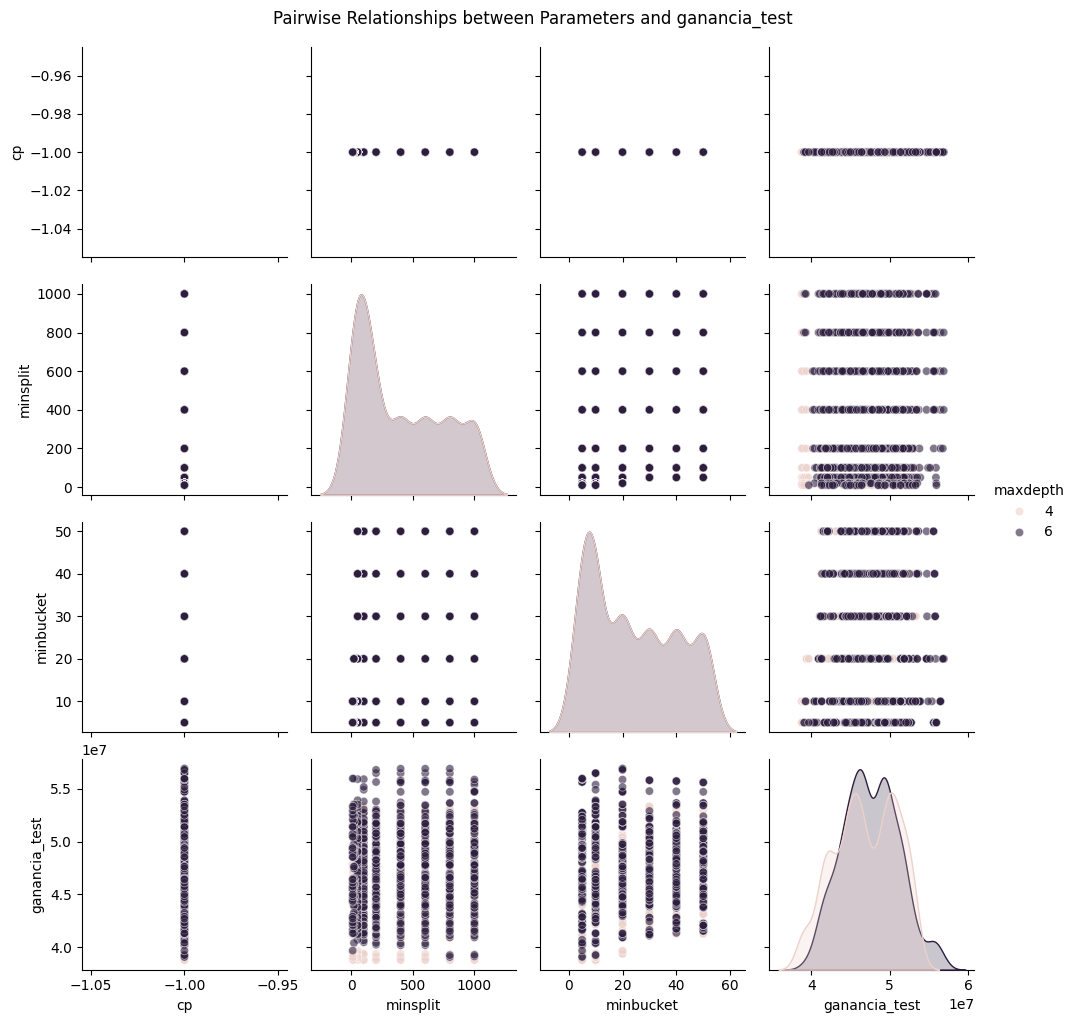

In [23]:
# Analyze parameter interactions
plt.figure(figsize=(15, 10))
sns.pairplot(df[['cp', 'maxdepth', 'minsplit', 'minbucket', 'ganancia_test']], hue='maxdepth', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships between Parameters and ganancia_test', y=1.02)
plt.show()

In [25]:
# Identify regions of high performance
high_performance = df[df['ganancia_test'] > df['ganancia_test'].quantile(0.9)]
print("High-performance parameter ranges:")
for param in ['cp', 'maxdepth', 'minsplit', 'minbucket']:
    print(f"{param}: {high_performance[param].min()} to {high_performance[param].max()}")

High-performance parameter ranges:
cp: -1 to -1
maxdepth: 4 to 6
minsplit: 10 to 1000
minbucket: 5 to 50


In [27]:
# Identify regions of low performance
low_performance = df[df['ganancia_test'] < df['ganancia_test'].quantile(0.1)]
print("\nLow-performance parameter ranges:")
for param in ['cp', 'maxdepth', 'minsplit', 'minbucket']:
    print(f"{param}: {low_performance[param].min()} to {low_performance[param].max()}")


Low-performance parameter ranges:
cp: -1 to -1
maxdepth: 4 to 6
minsplit: 10 to 1000
minbucket: 5 to 50


In [28]:
# PCA to visualize parameter importance
scaler = StandardScaler()
pca = PCA()
pca_result = pca.fit_transform(scaler.fit_transform(df[['cp', 'maxdepth', 'minsplit', 'minbucket']]))

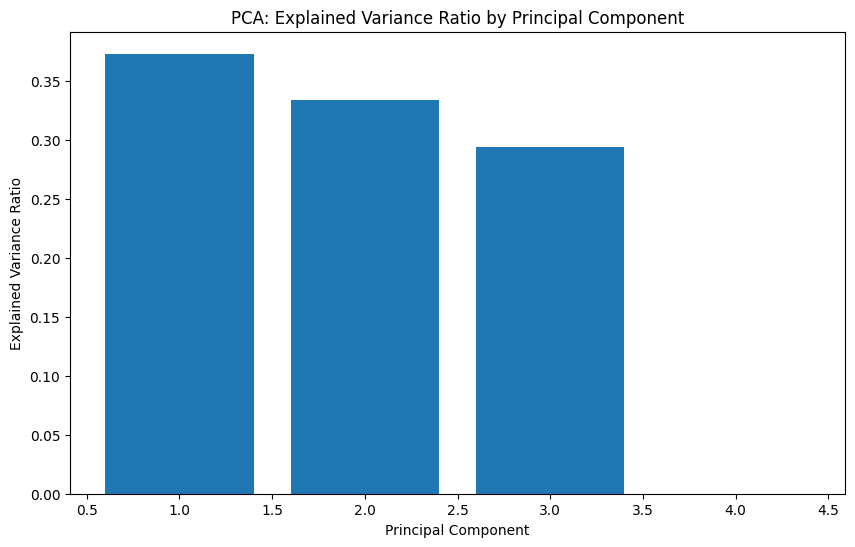

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 5), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio by Principal Component')
plt.show()

In [30]:
print("PCA Component Loadings:")
print(pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=['cp', 'maxdepth', 'minsplit', 'minbucket']))


PCA Component Loadings:
                    PC1           PC2           PC3  PC4
cp        -0.000000e+00  0.000000e+00  0.000000e+00  1.0
maxdepth   2.044940e-15  1.000000e+00  1.910109e-15  0.0
minsplit   7.071068e-01 -9.534008e-17 -7.071068e-01  0.0
minbucket  7.071068e-01 -2.796642e-15  7.071068e-01  0.0


In [31]:
# Analyzing the stability of top performers
top_10_percent = df_sorted.head(int(len(df) * 0.1))
print("\nStability of top 10% performers:")
for param in ['cp', 'maxdepth', 'minsplit', 'minbucket']:
    print(f"{param} - Most common value: {top_10_percent[param].mode().values[0]}, Frequency: {top_10_percent[param].value_counts().iloc[0] / len(top_10_percent):.2%}")


Stability of top 10% performers:
cp - Most common value: -1, Frequency: 100.00%
maxdepth - Most common value: 4, Frequency: 55.32%
minsplit - Most common value: 400, Frequency: 14.89%
minbucket - Most common value: 10, Frequency: 26.60%


In [32]:
# Suggestion for next iteration of grid search
print("\nSuggested ranges for next iteration of grid search:")
for param in ['cp', 'maxdepth', 'minsplit', 'minbucket']:
    lower = top_10_percent[param].quantile(0.1)
    upper = top_10_percent[param].quantile(0.9)
    print(f"{param}: {lower} to {upper}")


Suggested ranges for next iteration of grid search:
cp: -1.0 to -1.0
maxdepth: 4.0 to 6.0
minsplit: 20.0 to 1000.0
minbucket: 10.0 to 50.0


In [34]:
# Efficiency analysis
efficiency = df.copy()
efficiency['rank'] = efficiency['ganancia_test'].rank(ascending=False)
efficiency['efficiency'] = efficiency['ganancia_test'] / efficiency['rank']

print("\nTop 10 most efficient parameter combinations:")
print(efficiency.sort_values('efficiency', ascending=False).head(10)[['cp', 'maxdepth', 'minsplit', 'minbucket', 'ganancia_test', 'efficiency']])


Top 10 most efficient parameter combinations:
      cp  maxdepth  minsplit  minbucket  ganancia_test    efficiency
1347  -1         6       400         20     56900000.0  2.845000e+07
1227  -1         6       600         20     56900000.0  2.845000e+07
1107  -1         6       800         20     56900000.0  2.845000e+07
1467  -1         6       200         20     56790000.0  1.419750e+07
1327  -1         6       400         10     56480000.0  8.689231e+06
1447  -1         6       200         10     56480000.0  8.689231e+06
1207  -1         6       600         10     56480000.0  8.689231e+06
1087  -1         6       800         10     56480000.0  8.689231e+06
1847  -1         6        10          5     55970000.0  6.218889e+06
1787  -1         6        20          5     55950000.0  5.595000e+06


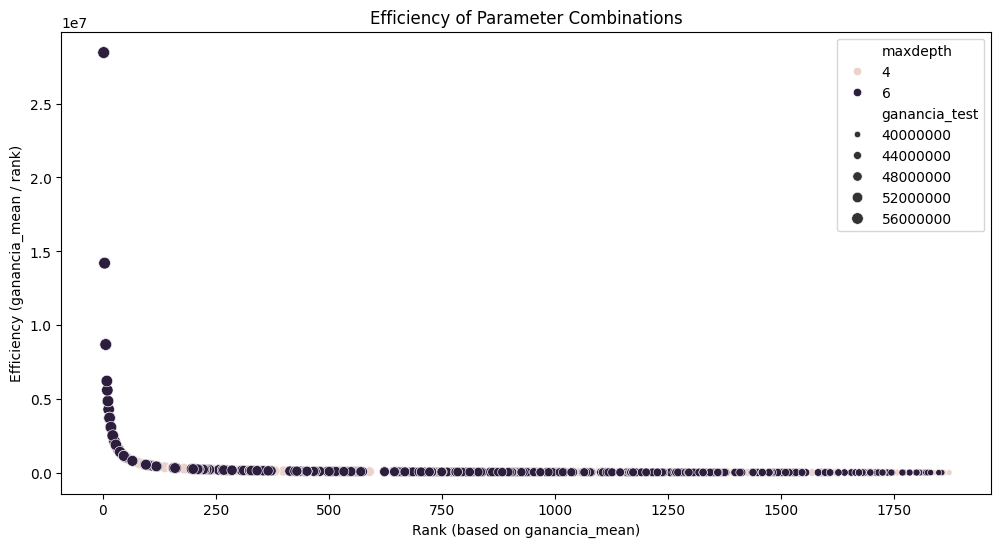

In [36]:
# Visualize efficiency
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rank', y='efficiency', hue='maxdepth', size='ganancia_test', data=efficiency)
plt.title('Efficiency of Parameter Combinations')
plt.xlabel('Rank (based on ganancia_mean)')
plt.ylabel('Efficiency (ganancia_mean / rank)')
plt.show()